# Disputed Author Project (dap)

In [56]:
import pandas as pd
import numpy as np

In [57]:
import os

authors = '/Users/thughes/Dropbox/Code/disputed_authors/Classics/'

dataset = pd.DataFrame(columns=['meta_author', 'meta_title', 'meta_body'])

for author in os.listdir(authors):
    if author == '.DS_Store':
        continue
    for doc in os.listdir(authors+author):
        print "Adding", author, doc
        f = open(authors+author+"/"+doc)
        s = f.read()
        f.close
        
        dp = {
            'meta_author': author,
            'meta_title': doc,
            'meta_body': s
        }
        
        dataset = dataset.append(dp, ignore_index=True)
        


Adding Aristotle Economics_I
Adding Aristotle Economics_II
Adding Aristotle Ethica_Eudemia_I
Adding Aristotle Ethica_Eudemia_II
Adding Aristotle Ethica_Eudemia_III
Adding Aristotle Ethica_Eudemia_IV
Adding Aristotle Ethica_Eudemia_V
Adding Aristotle Metaphysics_I
Adding Aristotle Metaphysics_II
Adding Aristotle Metaphysics_III
Adding Aristotle Metaphysics_IV
Adding Aristotle Metaphysics_IX
Adding Aristotle Metaphysics_V
Adding Aristotle Metaphysics_VI
Adding Aristotle Metaphysics_VII
Adding Aristotle Metaphysics_VIII
Adding Aristotle Metaphysics_X
Adding Aristotle Metaphysics_XI
Adding Aristotle Metaphysics_XII
Adding Aristotle Metaphysics_XIII
Adding Aristotle Metaphysics_XIV
Adding Aristotle Nico_Ethics_I
Adding Aristotle Nico_Ethics_II
Adding Aristotle Nico_Ethics_III
Adding Aristotle Nico_Ethics_IV
Adding Aristotle Nico_Ethics_IX
Adding Aristotle Nico_Ethics_V
Adding Aristotle Nico_Ethics_VI
Adding Aristotle Nico_Ethics_VII
Adding Aristotle Nico_Ethics_VIII
Adding Aristotle Nico_Et

In [58]:
# Convert the text into tf_idf values
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()

tf_idf_vec = vec.fit_transform(dataset['meta_body'])

In [59]:
# Convert the tf_idf matrix into a data frame with labels
tf_idf_df = pd.DataFrame(columns=vec.get_feature_names(), data=tf_idf_vec.toarray())

In [60]:
# Combine the original data set with the tf_idf dataframe
cluster_df = dataset.join(tf_idf_df).drop('meta_body', 1)

In [61]:
#cluster_df = cluster_df.set_index('meta_title')

In [62]:
# These are our final data sets.  y is author, X contains the text data
y_set = cluster_df['meta_author']

In [63]:
X_set = cluster_df

In [70]:
# Naive way to graph a cluster is just reduce the dimensions to 2 with svd
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
svd.fit(X_set.drop(['meta_author', 'meta_title'], 1))

svd_plotdata = []
authors = X_set['meta_author'].unique()


for author in authors:
    svd_plotdata.append(svd.transform(X_set.loc[X_set['meta_author'] == author].drop(['meta_author', 'meta_title'], 1)))
    

print len(svd_authors)

0


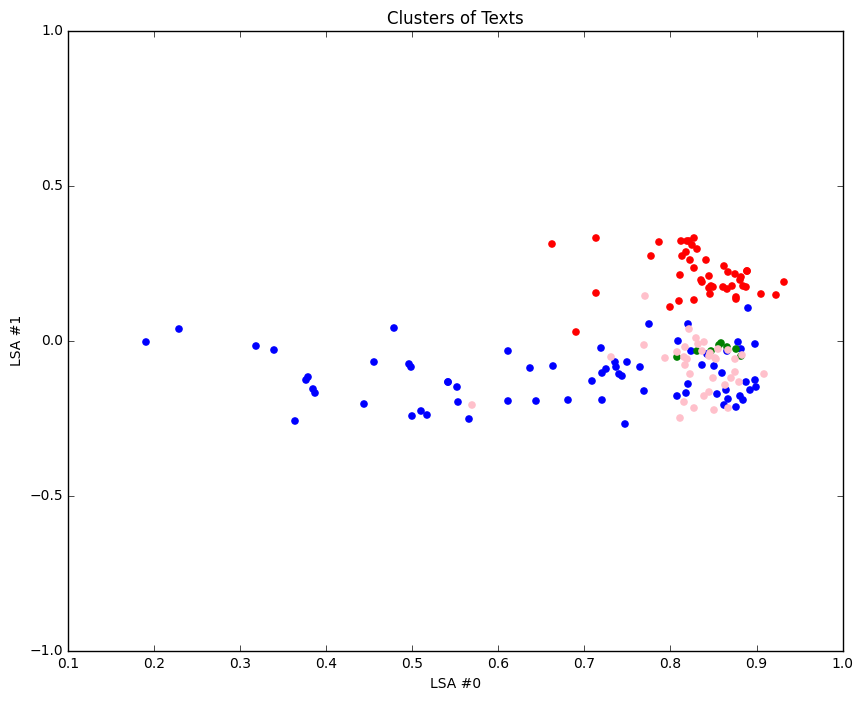

In [78]:
# Graph the results on a 2D plane
import matplotlib.pyplot as plt
import random

%matplotlib inline

#plt.figure(figsize=(100,100))
plt.figure(figsize=(10,8), dpi=300)
plt.ylabel('LSA #1')
plt.xlabel('LSA #0')
plt.ylim(ymin=-1, ymax=1)
plt.title('Clusters of Texts')

display_color = ['red', 'blue', 'green', 'pink', 'cyan', 'orange', 'purple', 'yellow']

ci = 0
for plotdata in svd_plotdata:
    plt.scatter(plotdata[:, 0], plotdata[:,1], color=display_color[ci])
    ci += 1


plt.show()

# Note on Visualization

* Red: Aristotle
* Blue: Plato
* Pink: Xenophon
* Green: Thucydides